# INTRODUCTION

## The ease of meal delivery services has become a crucial aspect of our everyday lives in today's fast-paced society. The food delivery business has experienced rapid expansion, changing how we eat our favorite foods. Understanding client preferences and ordering trends is now essential for restaurants and food delivery platforms to optimize their services and raise customer happiness as this industry continues to develop.In order to uncover insightful information, this project will do an extensive Exploratory Data Analysis (EDA) on food delivery data. We hope to obtain a thorough understanding of client preferences for various food products by analyzing this data in order to determine peak order times, investigate the popularity of different cuisines, and identify popular food items. 

## PROBLEM STATEMENT

Identify peak order periods, popular cuisines, and consumer preferences for various food products by analyzing data on food delivery.

# Importing the Required Libraries to Perform EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Load our Dataset of Food Order

In [2]:
df=pd.read_csv('food_order.csv')

In [3]:
# show top 5 rows for our dataset
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [4]:
# show last 5 rows for our dataset
df.tail()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.45,Weekend,Not given,28,24


In [5]:
# getting dimension of our dataset
df.shape

(1898, 9)

# Show Some more Information about Our Dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


# Show some more Statistical information about our Dataset 

In [7]:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


mimimum food preparation time is 20 min.

average delivery time of food is approx 24 min.

maximum food preparation time is 35 min.

In [8]:
# checking for null values in this dataset
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

This Dataset contain no null values.

In [9]:
# checking for duplicate values
df.duplicated().sum()

0

This dataset contain no duplicate values.

In [10]:
df['rating'].replace(to_replace='Not given', value=0, inplace=True)

In [11]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,0,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,0,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [12]:
# changing Rating column type from object to Float
df['rating']=df['rating'].astype(int)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   int32  
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int32(1), int64(4), object(3)
memory usage: 126.2+ KB


# Performing EDA on our Dataset

In [14]:
df.cuisine_type.value_counts()

American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: cuisine_type, dtype: int64

Because this dataset is from NYC restuarent therefore it is obvious that american dishes is in most demand.

In [15]:
df.day_of_the_week.value_counts()

Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64

people ordered more on weekends as compared to weekdays.

weekend--> saturday and sunday

weekday--> monday to friday

In [16]:
df.rating.value_counts()

0    736
5    588
4    386
3    188
Name: rating, dtype: int64

In [17]:
df['food_preparation_time'].mean()

27.371970495258168

average time taken to prepare a dish is approximately 27 min.

food preparation time is calculated by the time difference of restaurent's order confirmation and delivery person's pick up confirmation.

In [18]:
df['delivery_time'].mean()

24.161749209694417

average delivery time of ordered food is approximately 24 min.

delivery time is calculated by the difference of delivery's pick up confirmation and drop information. 

C:\Users\TONY\AppData\Local\Temp\ipykernel_31468\3454688065.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df=df.corr()


<Axes: >

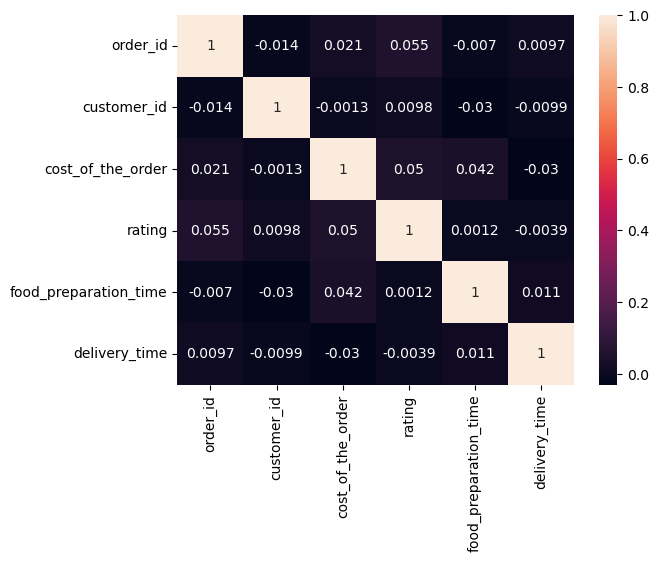

In [19]:
corr_df=df.corr()
sns.heatmap(corr_df, annot = True)

<Axes: xlabel='count', ylabel='cuisine_type'>

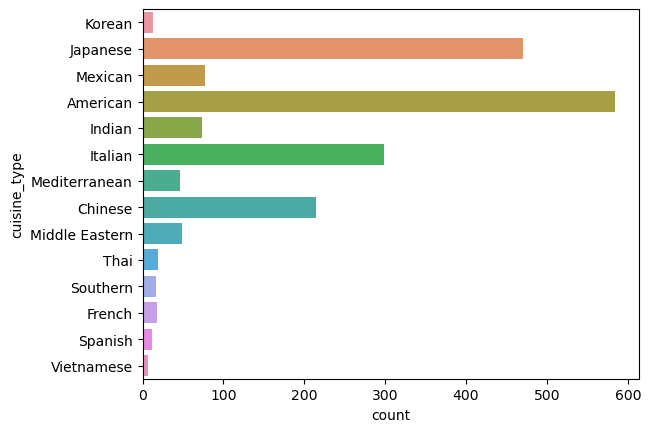

In [20]:
sns.countplot(y='cuisine_type',data=df)

in this we can see the most demanded cuisine type which has been ordered.

<Axes: xlabel='day_of_the_week', ylabel='count'>

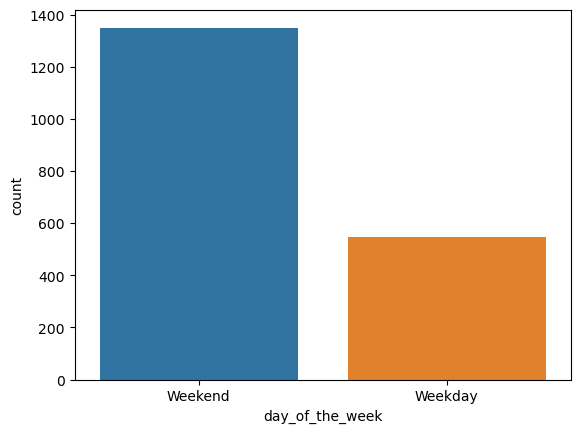

In [21]:
sns.countplot(x='day_of_the_week',data=df)

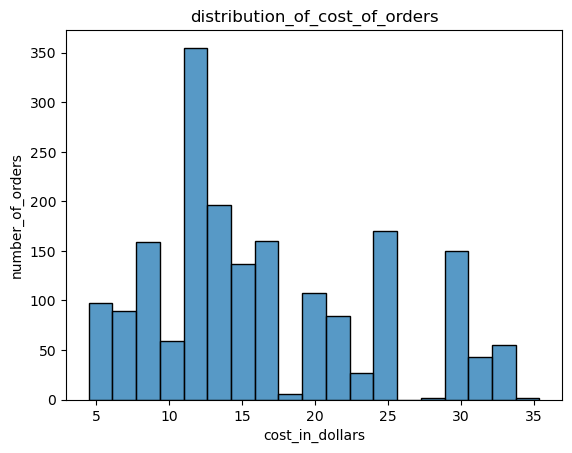

In [22]:
# we will show the distribution of cost of order
sns.histplot(x='cost_of_the_order',data=df)
plt.ylabel('number_of_orders')
plt.xlabel('cost_in_dollars')
plt.title('distribution_of_cost_of_orders')
plt.show()

In [23]:
# showing the top 5 most ordered cuisines on weekend
df[df.day_of_the_week=='Weekend'].cuisine_type.value_counts().iloc[0:5]

American    415
Japanese    335
Italian     207
Chinese     163
Mexican      53
Name: cuisine_type, dtype: int64

In [24]:
# checking the name of top 5 restaurents
top_5_restaurent_names=df['restaurant_name'].value_counts().reset_index().iloc[0:5,0]
top_5_restaurent_names
df['restaurant_name'].value_counts().iloc[0:5]

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

shack shack has the most no. of orders.

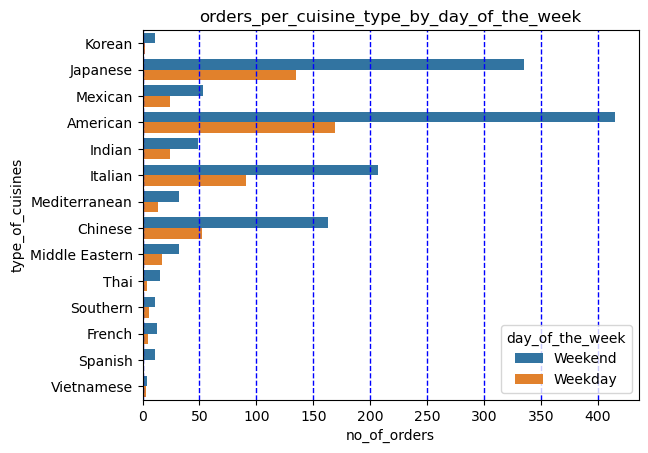

In [25]:
# displaying distribution of cuisine type on weekend and weekday
sns.countplot(y='cuisine_type',data=df, hue='day_of_the_week')
plt.xlabel('no_of_orders')
plt.ylabel('type_of_cuisines')
plt.title('orders_per_cuisine_type_by_day_of_the_week')
plt.grid(axis = 'x', color = 'blue', linestyle = '--', linewidth = 1.0)
plt.show()

In [26]:
# no. of restaurants serving multiple types of cuisines
df.groupby(['restaurant_name'])['cuisine_type'].nunique().sort_values(ascending=False)

restaurant_name
The Meatball Shop              2
'wichcraft                     1
Pepe Rosso To Go               1
Piccolo Angolo                 1
Pinto Nouveau Thai Bistro      1
                              ..
Galli Restaurant               1
Go! Go! Curry!                 1
Grand Sichuan International    1
Haandi                         1
indikitch                      1
Name: cuisine_type, Length: 178, dtype: int64

only 1 restuarant named 'The Meatball Shop' served 2 cuisines.

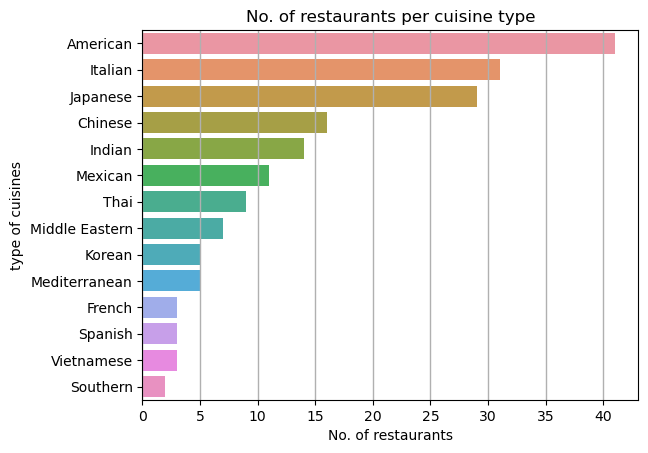

,cuisine_type,restaurant_count
0,American,41
1,Italian,31
2,Japanese,29
3,Chinese,16
4,Indian,14


In [27]:
# number of restaurants per cuisine types
df1 = df.groupby(['cuisine_type'])['restaurant_name'].nunique().sort_values(ascending=False).reset_index()
df1.rename(columns={'restaurant_name': 'restaurant_count'}, inplace=True)


# plotting number of restaurants per cuisine

sns.barplot(y='cuisine_type', x='restaurant_count',data=df1)
plt.xlabel('No. of restaurants')
plt.ylabel('type of cuisines')
plt.title('No. of restaurants per cuisine type')
plt.grid(axis = 'x', linewidth = 1.0)
plt.show()
df1.head()

# Observations:

1. American dishes are in most demanded.
2. People of New York order more food in weekends as compared to weekdays.
3. Every restaurant has only 1 type of cuisine except shack shack which serves 2 cuisines.
4. American, Chinese, Japanese, Italian are the most in-demand type of cuisines.
5. weekends are the favourable for doing business.

#  Recommendations:

1. Try to give some discounts on weekends.
2. Try to add more restaursants of Indian, Thai and Spanish food as these are highly rated.
3. Add more type of cuisines in the restaurants.